# Conculational Neural Network (CNN)

[Convulational Neural Network](https://www.youtube.com/watch?v=HGwBXDKFk9I)

- CNN used to recognize patterns in images.

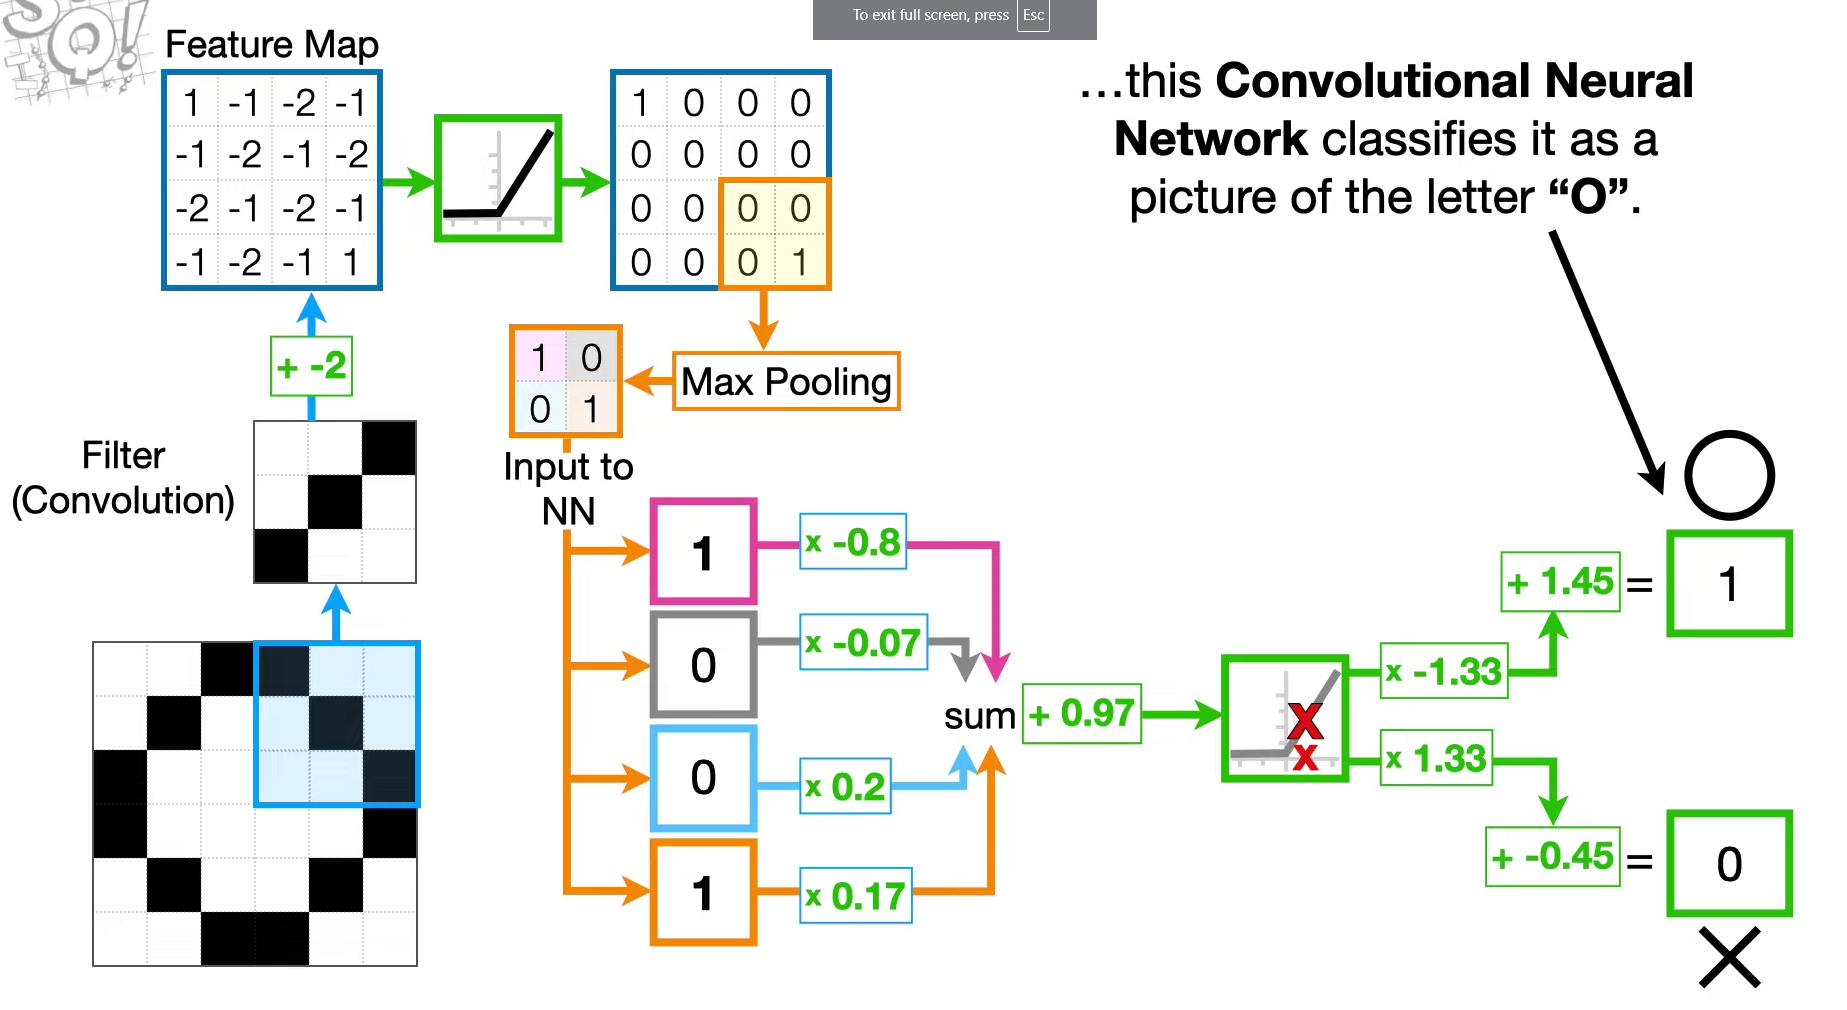

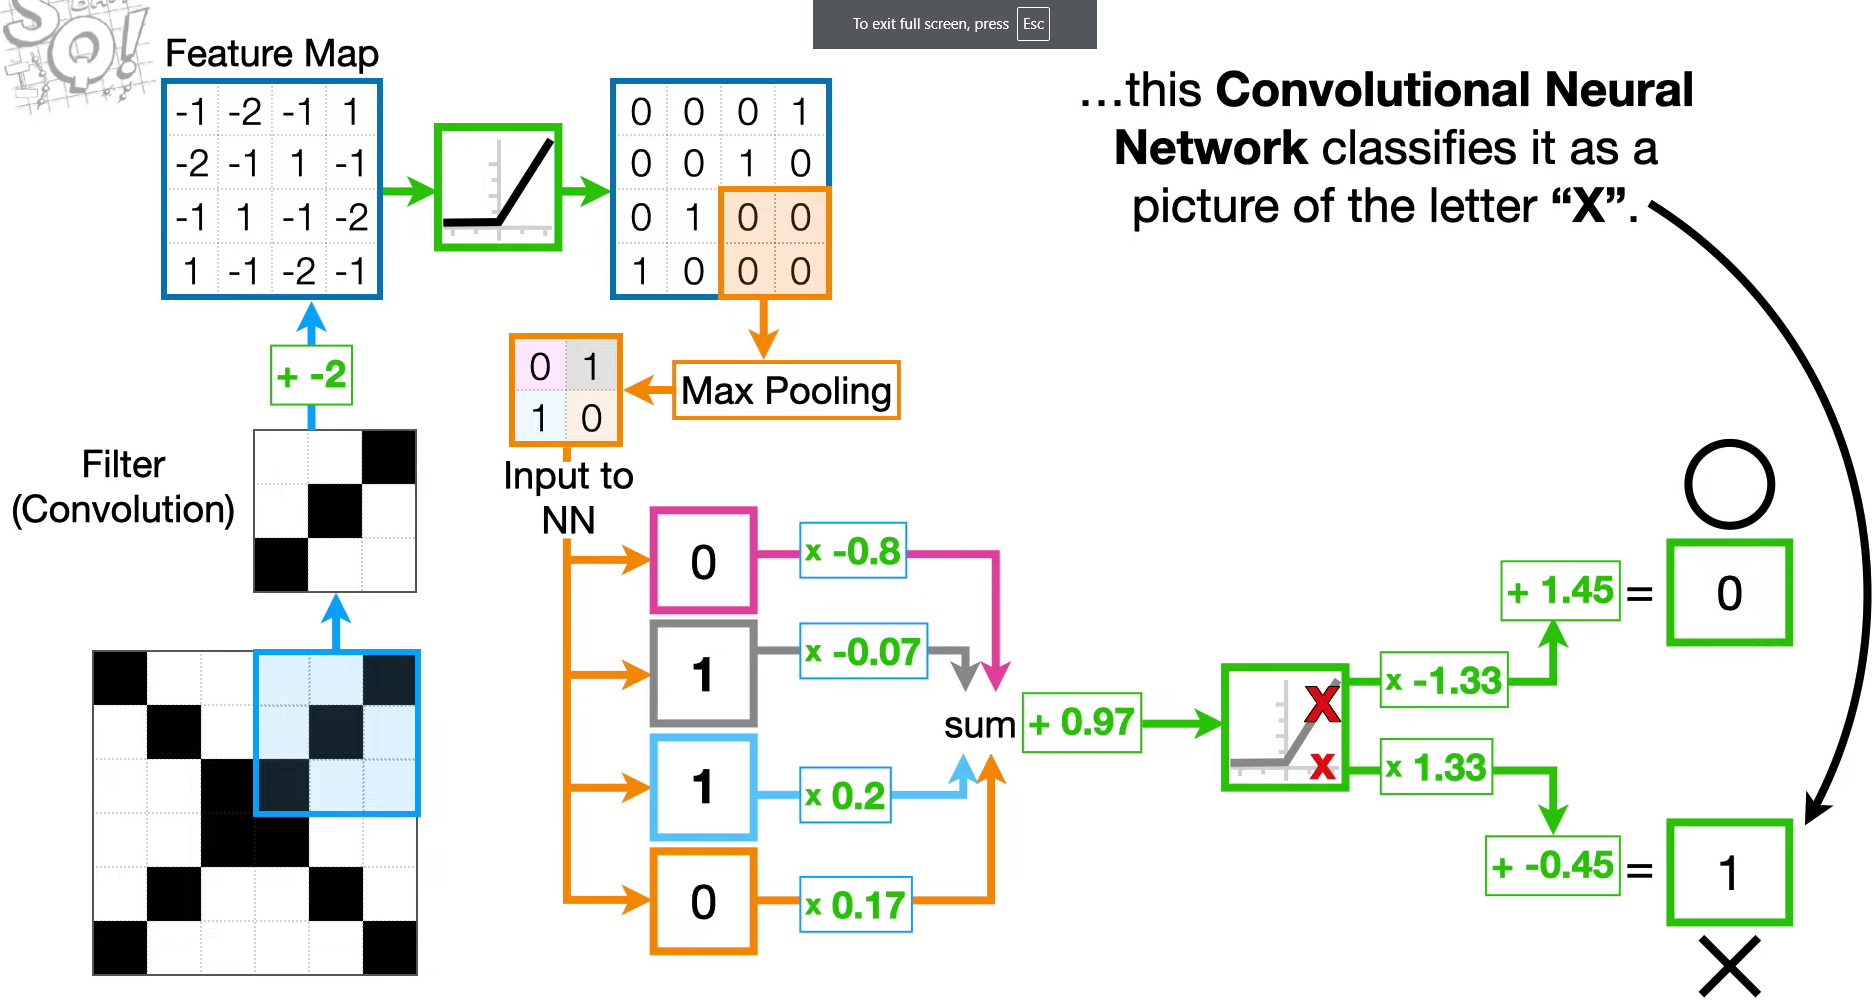

CNN
1. Reduce the number of input nodes
2. Tolerate small shift in where the pixels are in the image
3. Take advantage of the correlation that we observe in complex images

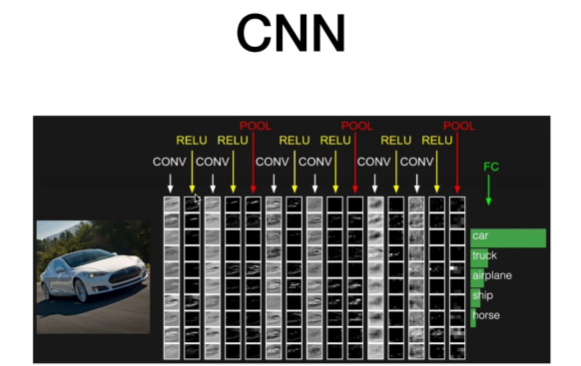
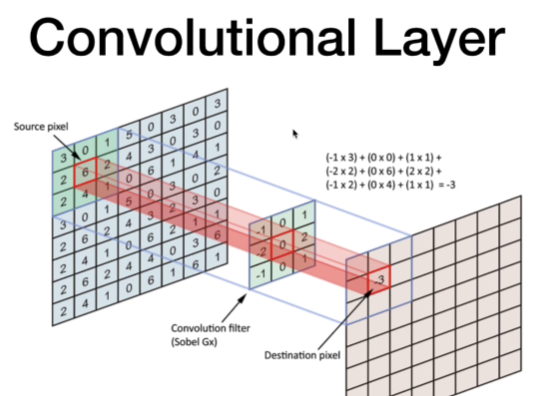
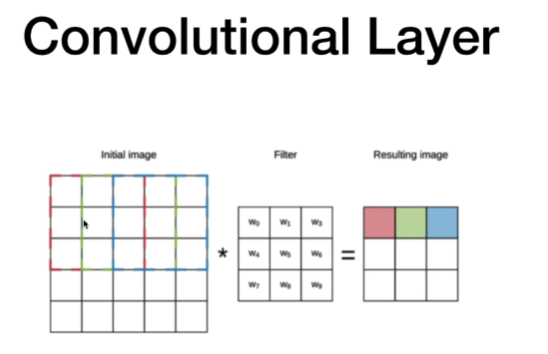
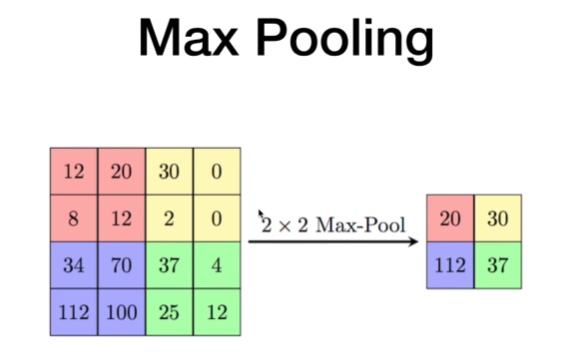
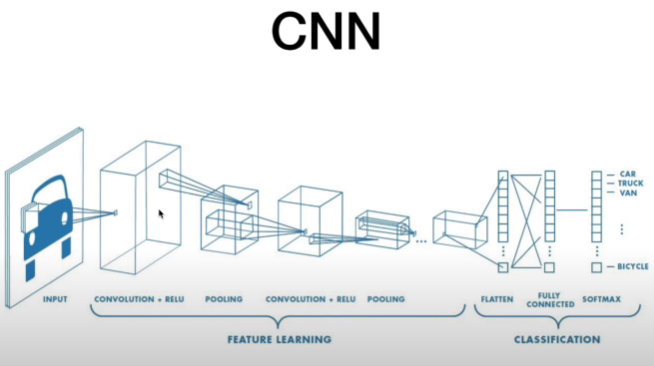

In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [16]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [17]:
# Hyper-parameters 
num_epochs = 20
batch_size = 4
learning_rate = 0.001

In [18]:
# dataset has PILImage images of range [0, 1]. 
# We transform them to Tensors of normalized range [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [19]:
# CIFAR10: 60000 32x32 color images in 10 classes, with 6000 images per class
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False)


Files already downloaded and verified
Files already downloaded and verified


In [20]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [21]:
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [22]:
# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

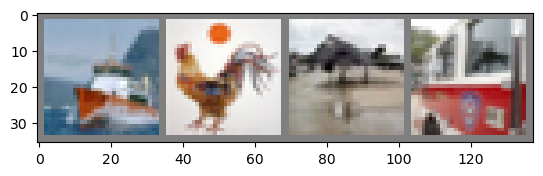

In [23]:
# show images
imshow(torchvision.utils.make_grid(images))

In [24]:
conv1 = nn.Conv2d(3, 6, 5) # 3 input channels, 6 output channels, 5x5 kernel
pool = nn.MaxPool2d(2, 2)
conv2 = nn.Conv2d(6, 16, 5)
print(images.shape) # [4, 3, 32, 32], batch size = 4, 3 color channels, 32x32 images

torch.Size([4, 3, 32, 32])


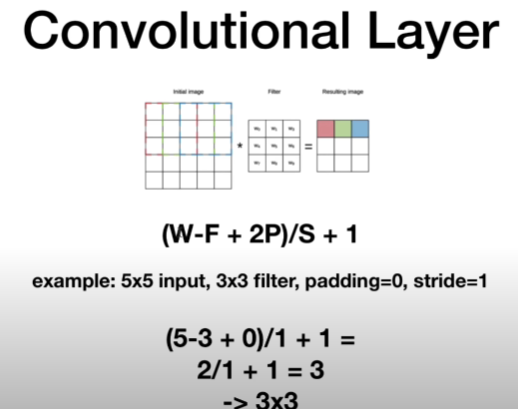

In [25]:
x = conv1(images)
print(x.shape) # [4, 6, 28, 28], 6 output channels, 28x28 images

torch.Size([4, 6, 28, 28])


In [26]:
x = pool(x) # reduce image size by half
print(x.shape) # [4, 6, 14, 14], 6 output channels, 14x14 images

torch.Size([4, 6, 14, 14])


In [27]:
x = conv2(x)
print(x.shape) # [4, 16, 10, 10], 16 output channels, 10x10 images

torch.Size([4, 16, 10, 10])


In [28]:
x = pool(x)
print(x.shape) # [4, 16, 5, 5], 16 output channels, 5x5 images

torch.Size([4, 16, 5, 5])


In [29]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        # input 3 color channels, 6 output channels(feature map), 5x5 kernel/filter size
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # -> n, 3, 32, 32
        x = self.pool(F.relu(self.conv1(x)))  # -> n, 6, 14, 14
        x = self.pool(F.relu(self.conv2(x)))  # -> n, 16, 5, 5
        x = x.view(-1, 16 * 5 * 5)            # -> n, 400 - flatten
        x = F.relu(self.fc1(x))               # -> n, 120
        x = F.relu(self.fc2(x))               # -> n, 84
        x = self.fc3(x)                       # -> n, 10
        return x


In [30]:
model = ConvNet().to(device)

In [31]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [32]:
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [4, 3, 32, 32] = 4, 3, 1024
        # input_layer: 3 input channels, 6 output channels, 5 kernel size
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 2000 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

print('Finished Training')

Epoch [1/20], Step [2000/12500], Loss: 2.3424
Epoch [1/20], Step [4000/12500], Loss: 2.3171
Epoch [1/20], Step [6000/12500], Loss: 2.3100
Epoch [1/20], Step [8000/12500], Loss: 2.3036
Epoch [1/20], Step [10000/12500], Loss: 2.2826
Epoch [1/20], Step [12000/12500], Loss: 2.2478
Epoch [2/20], Step [2000/12500], Loss: 2.1094
Epoch [2/20], Step [4000/12500], Loss: 2.2157
Epoch [2/20], Step [6000/12500], Loss: 1.8065
Epoch [2/20], Step [8000/12500], Loss: 1.9166
Epoch [2/20], Step [10000/12500], Loss: 2.1551
Epoch [2/20], Step [12000/12500], Loss: 1.8272
Epoch [3/20], Step [2000/12500], Loss: 2.1724
Epoch [3/20], Step [4000/12500], Loss: 1.8126
Epoch [3/20], Step [6000/12500], Loss: 1.3105
Epoch [3/20], Step [8000/12500], Loss: 1.7108
Epoch [3/20], Step [10000/12500], Loss: 1.5731
Epoch [3/20], Step [12000/12500], Loss: 1.5850
Epoch [4/20], Step [2000/12500], Loss: 1.4677
Epoch [4/20], Step [4000/12500], Loss: 2.4790
Epoch [4/20], Step [6000/12500], Loss: 1.4242
Epoch [4/20], Step [8000/125

In [ ]:
# Save the model
PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)

In [ ]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        
        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')

Accuracy of the network: 48.93 %
Accuracy of plane: 39.9 %
Accuracy of car: 69.9 %
Accuracy of bird: 30.5 %
Accuracy of cat: 31.1 %
Accuracy of deer: 41.5 %
Accuracy of dog: 37.3 %
Accuracy of frog: 74.8 %
Accuracy of horse: 44.5 %
Accuracy of ship: 71.2 %
Accuracy of truck: 48.6 %
